## Day 14

https://adventofcode.com/2023/day/14

In [3]:
import numpy as np

EMPTY  = 0
ROUND  = 1
SQUARE = 2

def readInput14(infile):
    with open(infile) as f:
        lines = [ l.strip("\n") for l in f.readlines() ]
        rocks = np.zeros((len(lines),len(lines[0])),dtype=int) 
        for j,l in enumerate(lines):
            for i,r in enumerate(l):
                if r=="#":
                    rocks[j,i] = SQUARE
                if r=="O":
                    rocks[j,i] = ROUND
        return rocks

def tilt_north(rocks):
    for j,l in enumerate(rocks):
        for i,r in enumerate(l):
            if r==ROUND:
                jhere = j
                while True:
                    jnext = jhere-1
                    if jnext<0:
                        break
                    if rocks[jnext,i]==EMPTY:
                        rocks[jnext,i]=ROUND
                        rocks[jhere,i]=EMPTY
                        jhere = jnext
                    else:
                        break
    return

def load(rocks):
    return sum([ (len(rocks)-j)*sum(l[l==ROUND]) for j,l in enumerate(rocks) ])

def part1(infile):
    rocks = readInput14(infile)
    tilt_north(rocks)
    return load(rocks)

In [4]:
print("Test 1:",part1("examples/example14.txt"))
print("Part 1:",part1("AOC2023inputs/input14.txt"))

Test 1: 136
Part 1: 108889


In [5]:
def title_cycle(rocks):
    for _ in range(4):
        tilt_north(rocks)
        rocks = np.rot90(rocks,k=3)
    return rocks

def part2(infile):
    rocks = readInput14(infile)
    ncyclemax = 1_000_000_000
    ncycle = 0
    loads = {}
    while True:
        rocks = title_cycle(rocks)
        ncycle += 1
        h = hash(rocks.tobytes())
        if h in loads.keys():
            print("Found repetition at cycle {}!".format(ncycle))
            break
        l = load(rocks)
        loads[h] = (ncycle,l)
        if ncycle==ncyclemax:
            break
    cycle_end = ncycle
    cycle_start = loads[h][0]
    init_range = cycle_start-1
    loop_range = cycle_end-cycle_start
    print("Cycle loop begins at cycle {} and ends at cycle {} (period = {})".format(cycle_start,cycle_end-1,loop_range))
    nloops = (ncyclemax-init_range)//loop_range
    dcycle = (ncyclemax-init_range)%loop_range
    load_index = dcycle+init_range
    print("{} loops + {} cycles (after {} initial cycles) to reach load of {} cycles".format(nloops,dcycle,init_range,ncyclemax))
    print("Load of cycle {} corresponds to load of cycle {}".format(ncyclemax,load_index))
    for k,(c,l) in loads.items():
        if c==load_index:
            print("*** Final load = {} ***".format(l))
            return l

In [6]:
part2("examples/example14.txt")

Found repetition at cycle 10!
Cycle loop begins at cycle 3 and ends at cycle 9 (period = 7)
142857142 loops + 4 cycles (after 2 initial cycles) to reach load of 1000000000 cycles
Load of cycle 1000000000 corresponds to load of cycle 6
*** Final load = 64 ***


64

In [7]:
part2("AOC2023inputs/input14.txt")

Found repetition at cycle 153!
Cycle loop begins at cycle 139 and ends at cycle 152 (period = 14)
71428561 loops + 8 cycles (after 138 initial cycles) to reach load of 1000000000 cycles
Load of cycle 1000000000 corresponds to load of cycle 146
*** Final load = 104671 ***


104671

### Animation

In [34]:
import matplotlib.pyplot as plt
import matplotlib.colors
from celluloid import Camera

In [39]:
def animation14(infile, ncycleanim = 20):
    rocks = readInput14(infile)
    cmap_xmas = matplotlib.colors.ListedColormap(['white','red', 'green'])
    f = plt.figure(figsize=(4,4),dpi=100)
    ax = f.add_axes([0, 0, 1, 1])
    ax.axis('off')
    camera = Camera(f)
    plt.imshow(rocks,cmap=cmap_xmas)
    for _ in range(ncycleanim):
        for i in range(4):
            rocks = np.rot90(rocks,k=4-i)
            tilt_north(rocks)
            rocks = np.rot90(rocks,k=i)
            plt.imshow(rocks,cmap=cmap_xmas)
            camera.snap()
    return camera

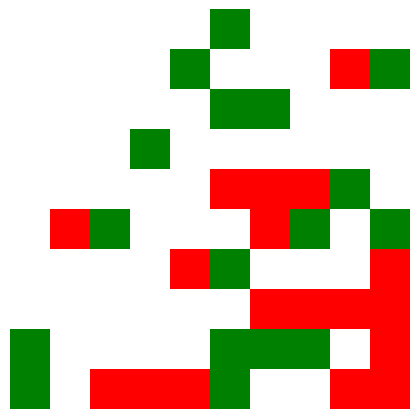

In [41]:
camera1 = animation14("examples/example14.txt")
anim1 = camera1.animate(blit=True)
anim1.save('visualisation/day14animation1.gif', writer='imagemagick')

![Rocks](./visualisation/day14animation1.gif)

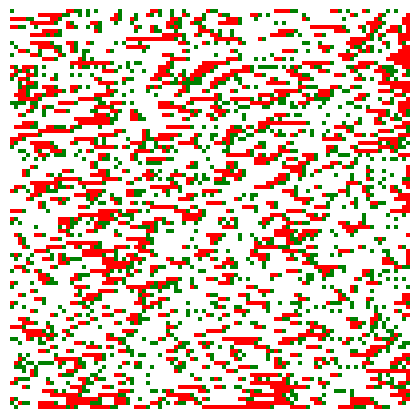

In [42]:
camera2 = animation14("AOC2023inputs/input14.txt")
anim2 = camera2.animate(blit=True)
anim2.save('visualisation/day14animation2.gif', writer='imagemagick')

![Rocks](./visualisation/day14animation2.gif)